# Audio features exploration

Artificially on a subset of the NSynth dataset.

In [1]:
import json
import os
import warnings

import librosa
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import timbral_models

In [2]:
%matplotlib widget

## Load data

In [3]:
ds_path = "/home/leo/datasets/nsynth/nsynth-test/"

In [4]:
metadata_fname = os.path.join(ds_path, "examples.json")

with open(metadata_fname, "r") as f:
    data = list(
        json.load(f).values()
    )  # TODO: there must be a better way to load a json into a DF
    data_frame = pd.DataFrame(data)
    mask = data_frame.instrument_str.isin(["reed_acoustic_037"])

In [5]:
data_frame = data_frame[mask]

In [6]:
data_frame.iloc[0]

qualities                [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
pitch                                                68
note                                              22259
instrument_source_str                          acoustic
velocity                                            127
instrument_str                        reed_acoustic_037
instrument                                          387
sample_rate                                       16000
qualities_str                                  [reverb]
instrument_source                                     0
note_str                      reed_acoustic_037-068-127
instrument_family                                     7
instrument_family_str                              reed
Name: 3, dtype: object

## Explore

In [7]:
warnings.simplefilter(action="ignore", category=FutureWarning)
timbral_features = timbral_models.timbral_extractor(
    os.path.join(ds_path, "audio", data_frame.iloc[0].note_str + ".wav")
)

Calculating hardness...
Calculating depth...
Calculating brightness...
Calculating roughness...
Calculating warmth...
Calculating sharpness...
Calculating boominess...
Calculating reverb...


In [8]:
timbral_features

{'hardness': 41.73243393782562,
 'depth': 33.9942412364617,
 'brightness': 52.804681610904616,
 'roughness': 30.306084412723155,
 'warmth': 45.30349938402487,
 'sharpness': 36.37374825674729,
 'boominess': 17.449763558586064,
 'reverb': 1}

In [9]:
features = np.zeros((len(data_frame)))

i = 0  # this is ugly
for idx, sample in data_frame.iterrows():
    features[i] = timbral_models.timbral_brightness(
        os.path.join(ds_path, "audio", sample.note_str + ".wav"),
    )
    i += 1

In [10]:
data_frame.head()

,qualities,pitch,note,instrument_source_str,velocity,instrument_str,instrument,sample_rate,qualities_str,instrument_source,note_str,instrument_family,instrument_family_str
3,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",68,22259,acoustic,127,reed_acoustic_037,387,16000,[reverb],0,reed_acoustic_037-068-127,7,reed
34,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",68,76159,acoustic,50,reed_acoustic_037,387,16000,[reverb],0,reed_acoustic_037-068-050,7,reed
38,"[0, 0, 0, 0, 1, 0, 0, 0, 1, 0]",32,54475,acoustic,127,reed_acoustic_037,387,16000,"[long_release, reverb]",0,reed_acoustic_037-032-127,7,reed
46,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",38,1014,acoustic,100,reed_acoustic_037,387,16000,[reverb],0,reed_acoustic_037-038-100,7,reed
104,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",35,62230,acoustic,100,reed_acoustic_037,387,16000,[reverb],0,reed_acoustic_037-035-100,7,reed


In [11]:
x = np.zeros((len(data_frame), 2))
x[:, 0] = data_frame["velocity"]
x[:, 1] = data_frame["pitch"]

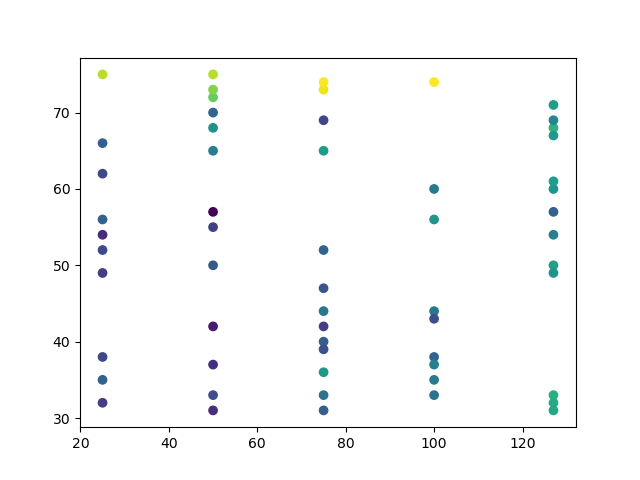

In [12]:
plt.figure()
plt.scatter(x[:, 0], x[:, 1], c=features)
plt.show()

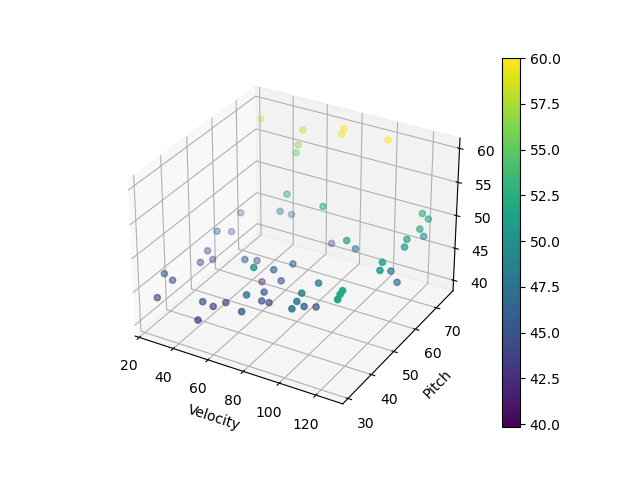

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
p = ax.scatter(x[:, 0], x[:, 1], features, c=features)
fig.colorbar(p)
ax.set_xlabel("Velocity")
ax.set_ylabel("Pitch")
ax.set_zlabel("Brightness")
plt.show()